In [2]:
import pandas as pd
import os

def make_dir(p):
    if not os.path.exists(p):
        os.makedirs(p)

## 2-hop

In [3]:
SOL_DATA_PATH = os.path.join('DCNDP_sols')

dcndp_2hop_agg_df = pd.read_csv('DCNDP_sols/DCNDP_NL_D2_2023_06_14_healthAuthority_ID/day2_0/hybrid_rate_0/partition_results.csv')
dcndp_2hop_disagg_df = pd.read_csv('DCNDP_sols/DCNDP_NL_D2_2023_06_14_healthAuthority_ID_disagg/day2_0/hybrid_rate_0/partition_results.csv')


In [4]:
# merge the two dataframes based on healthAuthority_ID,	partition,	c_count, add agg and disagg suffixes
dcndp_2hop_df = pd.merge(dcndp_2hop_agg_df, dcndp_2hop_disagg_df, on=['healthAuthority_ID', 'partition', 'c_count'], suffixes=('_agg', '_disagg'))

dcndp_2hop_df.columns


cols_to_keep = ['healthAuthority_ID', 'partition', 'c_count', 'component_size_agg','component_edges_agg', 'budget_agg',\
                'pre_optimization_short_pairs_agg', 'num_simplicials_agg', 'm_status_agg','m_obj_agg', 'm_MIPGap_agg', \
                'm_runtime_agg','m_status_disagg', 'm_obj_disagg', 'm_MIPGap_disagg', 'm_runtime_disagg']

dcndp_2hop_df = dcndp_2hop_df[cols_to_keep]

dcndp_2hop_df['density'] = 100 * (dcndp_2hop_df['component_edges_agg']/((dcndp_2hop_df['component_size_agg']*(dcndp_2hop_df['component_size_agg'] - 1))/2))

new_col_names = ['healthAuthority_ID', 'partition', 'c_count', 'component_size', 'component_edges', 'budget',\
                 'original_objective', 'num_simplicials', 'm_status_agg', 'm_obj_agg', 'm_MIPGap_agg', \
                'm_runtime_agg', 'm_status_disagg', 'm_obj_disagg', 'm_MIPGap_disagg', 'm_runtime_disagg', 'density']

dcndp_2hop_df.columns = new_col_names

dcndp_2hop_df['m_MIPGap_agg'] = 100 * dcndp_2hop_df['m_MIPGap_agg']
dcndp_2hop_df['m_MIPGap_disagg'] = 100 * dcndp_2hop_df['m_MIPGap_disagg']

dcndp_2hop_df['perc_reduction_obj_agg'] = 100 * (dcndp_2hop_df['original_objective'] - dcndp_2hop_df['m_obj_agg'])/dcndp_2hop_df['original_objective']
dcndp_2hop_df['perc_reduction_obj_disagg'] = 100 * (dcndp_2hop_df['original_objective'] - dcndp_2hop_df['m_obj_disagg'])/dcndp_2hop_df['original_objective']

In [5]:
summary_results_path = os.path.join("summary_results")
make_dir(summary_results_path)

dcndp_2hop_df.to_csv(os.path.join(summary_results_path, 'dcndp_2hop_summary_results.csv'), index=False)

In [6]:
#select where density is greater than 0.4
#dcndp_2hop_df = dcndp_2hop_df[dcndp_2hop_df['density'] > 0.5]


## 1-hop

In [8]:
dcndp_1hop_df = pd.read_csv('DCNDP_sols/DCNDP_1hop_NL_D2_2023_06_28_healthAuthority_ID/day2_0/hybrid_rate_0/partition_results.csv')


cols_to_keep = ['healthAuthority_ID', 'partition', 'c_count', 'component_size',\
                'component_edges', 'budget', 'pre_optimization_short_pairs', \
                    'm_status', 'm_obj', 'm_MIPGap', 'm_runtime']

dcndp_1hop_df = dcndp_1hop_df[cols_to_keep]

new_col_names = ['healthAuthority_ID', 'partition', 'c_count', 'component_size',\
                'component_edges', 'budget', 'original_objective', \
                    'm_status', 'm_obj', 'm_MIPGap', 'm_runtime']

dcndp_1hop_df.columns = new_col_names

dcndp_1hop_df['density'] = 100 * (dcndp_1hop_df['component_edges']/((dcndp_1hop_df['component_size']*(dcndp_1hop_df['component_size'] - 1))/2))
dcndp_1hop_df['m_MIPGap'] = 100 * dcndp_1hop_df['m_MIPGap']

dcndp_1hop_df['perc_reduction_obj'] = 100 * (dcndp_1hop_df['original_objective'] - dcndp_1hop_df['m_obj'])/dcndp_1hop_df['original_objective']

dcndp_1hop_df.to_csv(os.path.join(summary_results_path, 'dcndp_1hop_summary_results.csv'), index=False)

## morPOP network statistics

In [1]:
import pandas as pd

In [17]:
df = pd.read_csv('DCNDP_Datasets/NL_Day2/day2_0.csv')

print(df.columns)
df.head()


Index(['id', 'age', 'schoolLevel', 'ageRange', 'ageGroup', 'hazardRatio',
       'transmissionRate', 'commuter', 'probGetInfected', 'primcareWorker',
       'hospitalWorker', 'isPrimCarePatient', 'household_ID',
       'household_number_members', 'household_type', 'workplace_ID',
       'school_ID', 'healthAuthority_ID', 'busRoute_ID', 'workType',
       'homeCommunity', 'workCommunity', 'subwayRoute_ID',
       'workingHealthcareCenter'],
      dtype='object')


,id,age,schoolLevel,ageRange,ageGroup,hazardRatio,transmissionRate,commuter,probGetInfected,primcareWorker,...,household_type,workplace_ID,school_ID,healthAuthority_ID,busRoute_ID,workType,homeCommunity,workCommunity,subwayRoute_ID,workingHealthcareCenter
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,83.0,-1.0,16.0,3.0,51.386039,0.0,0.0,0.0,0.0,...,1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2,2,61.0,-1.0,12.0,2.0,5.593425,0.0,0.0,0.0,0.0,...,1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
3,3,75.0,-1.0,15.0,3.0,8.733300,0.0,0.0,0.0,0.0,...,1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,4,48.0,-1.0,9.0,2.0,1.094500,0.0,0.0,0.0,0.0,...,1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0


In [37]:
df['workCommunity'].value_counts()

-1.0      210900
 89.0     119015
 186.0     21378
 90.0      13395
 205.0     13200
           ...  
 183.0         8
 145.0         7
 115.0         7
 9.0           6
 17.0          5
Name: workCommunity, Length: 268, dtype: int64

In [6]:
continuous_features = ['age']
categorical_features = ['schoolLevel', 'commuter', 'primcareWorker',
 'hospitalWorker', 'isPrimCarePatient', 'household_number_members', 'household_type', 'workType']

df_selceted = df[continuous_features + categorical_features]

In [7]:
df_selceted.describe()


,age,schoolLevel,commuter,primcareWorker,hospitalWorker,isPrimCarePatient,household_number_members,household_type,workType
count,507554.000000,507554.000000,507554.000000,507554.000000,507554.000000,507554.0,507554.000000,507554.000000,507554.000000
mean,43.659965,-0.702485,0.269522,0.001255,0.017297,0.0,2.866107,1.567884,7.730541
std,22.795650,0.780062,0.443712,0.035404,0.130375,0.0,1.172948,0.662591,9.108770
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.000000,-1.000000
25%,25.000000,-1.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,-1.000000
50%,46.000000,-1.000000,0.000000,0.000000,0.000000,0.0,3.000000,2.000000,5.000000
75%,61.000000,-1.000000,1.000000,0.000000,0.000000,0.0,4.000000,2.000000,17.000000
max,100.000000,2.000000,1.000000,1.000000,1.000000,0.0,5.000000,2.000000,23.000000


In [26]:
# select coulmn df_selceted['household_number_members'] where value is not -1
a = df_selceted['household_number_members'][df_selceted['household_number_members'] != -1]

a.describe()

count    507553.000000
mean          2.866114
std           1.172937
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: household_number_members, dtype: float64

In [30]:
df_selceted['household_number_members'].value_counts()

 2.0    177330
 4.0    113120
 3.0    112871
 1.0     53052
 5.0     51180
-1.0         1
Name: household_number_members, dtype: int64

In [38]:
import os

# Initializing the sol_array
sol_array = []

data_directory = os.path.join("DCNDP_sols/DCNDP_NL_D2_2023_06_14_healthAuthority_ID/day2_0/hybrid_rate_0/healthAuthority_ID")
# Assuming you have a variable called data_directory which holds the path to your main directory
for dir_name in os.listdir(data_directory):
    # Constructing the full directory path
    dir_path = os.path.join(data_directory, dir_name)
    
    # Checking if it's a directory
    if os.path.isdir(dir_path):
        # Constructing the path to the sol.txt file inside the directory
        sol_file_path = os.path.join(dir_path, 'overall_sol.txt')
        
        # Checking if sol.txt exists
        if os.path.exists(sol_file_path):
            with open(sol_file_path, 'r') as file:
                # Reading numbers from the file and appending them to the sol_array
                for line in file:
                    number = float(line.strip())  # Assuming they are floating point numbers
                    sol_array.append(number)

# Printing the sol_array
print(len(sol_array))


100988


In [45]:
#From df, select those very hospitalWorker=1, primcareWorker=1, isPrimCarePatient=1,
# age > 80
df_healthcare = df[(df['hospitalWorker'] == 1) | (df['primcareWorker'] == 1) | (df['isPrimCarePatient'] == 1) | (df['age'] > 80)]
df_healthcare.shape
healthcare_ids = df_healthcare['id']

print("number of healthcare workers, patients, and people over 80: ", len(healthcare_ids))
#check how many of sol_arrya in healthcare_ids
count = 0
for i in sol_array:
    if i in healthcare_ids:
        count += 1
print("Number of healthcare workers, patients, and people over 80 in sol_array: ", count)

number of healthcare workers, patients, and people over 80:  27299
Number of healthcare workers, patients, and people over 80 in sol_array:  1512


In [50]:

df_healthcare = df[(df['hospitalWorker'] == 1) | (df['primcareWorker'] == 1) | (df['isPrimCarePatient'] == 1)]
df_age = df[df['age'] > 80]

healthcare_ids = df_healthcare['id'].tolist()
age_ids = df_age['id'].tolist()

In [52]:
import networkx as nx
G = nx.read_edgelist('DCNDP_Datasets/NL_Day2/day2_0.el', nodetype=int)

G_healthcare = G.subgraph(healthcare_ids)
G_age = G.subgraph(age_ids)

G_realistic =  G.subgraph(healthcare_ids + age_ids)

In [55]:
for _g in [G, G_healthcare, G_age, G_realistic]:
    print(_g.number_of_nodes(), _g.number_of_edges(), nx.density(_g), _g.number_of_edges()/_g.number_of_nodes())

507555 3296180 2.559031020218756e-05 6.494232152180552
9416 145492 0.00328233070476756 15.451571792693288
17883 4298 2.6880660742401697e-05 0.24033998769781356
27299 151029 0.000405333757361645 5.5324004542290925


In [56]:
27299/507555 *100

5.37853040557181

In [88]:
# read json file
import json
import pickle
with open('DCNDP_manu_results/healthAuthority_ID/2-hop DCNDP - agg constraints/HA_exps.json') as json_file:
    regional_data = json.load(json_file)

# read pickle file
with open('DCNDP_manu_results/healthAuthority_ID/2-hop DCNDP - agg constraints/overall_G_rollouts.pickle', 'rb') as handle:
    provincial_data = pickle.load(handle)

type(regional_data['0']['rollouts'])

list

In [95]:
regional_data['0']['rollouts']

[{'name': 'baseline',
  'rollout': [182528,
   138942,
   213669,
   29416,
   86417,
   220155,
   115053,
   5174,
   173130,
   25085,
   158708,
   47585,
   225348,
   128677,
   80564,
   56788,
   86625,
   257145,
   236382,
   415118,
   265519,
   172140,
   406485,
   89735,
   137988,
   81324,
   420497,
   284470,
   284611,
   200219,
   99334,
   258408,
   414607,
   56886,
   157576,
   409575,
   187895,
   282036,
   52162,
   193807,
   409147,
   39524,
   89887,
   87038,
   17219,
   144750,
   246589,
   63422,
   153470,
   151845,
   67177,
   213312,
   147643,
   13121,
   234646,
   402713,
   244803,
   240106,
   184015,
   102086,
   191693,
   279035,
   51546,
   416803,
   159848,
   190272,
   143514,
   226930,
   115694,
   139838,
   191102,
   90551,
   258955,
   26076,
   121758,
   136152,
   168579,
   407072,
   127029,
   412596,
   167171,
   20628,
   406760,
   150415,
   11365,
   122357,
   417818,
   168843,
   157296,
   236318,
   

In [83]:
print(provincial_data[2]['name'])
len(provincial_data[0]['rollout'])


dcndp


507554

In [84]:
data_new = {}

for exp_data in provincial_data:
    exp_name = exp_data['name']
    curr_overall_rollout = exp_data['rollout']
    print(exp_name, len(curr_overall_rollout)) 

    curr_dict = {'province_wide': curr_overall_rollout}



    for key in regional_data.keys():
        curr_dict['RHA_{}'.format(key)] = regional_data[key]['rollout']

    data_new[exp_name] = curr_dict



baseline 507554


KeyError: 'rollout'

## Modified 1-hop

In [1]:
from gurobi_solvers_onnline_supp import solve_modified_1hop_DCND, solve_modified_2hop_DCND
import networkx as nx

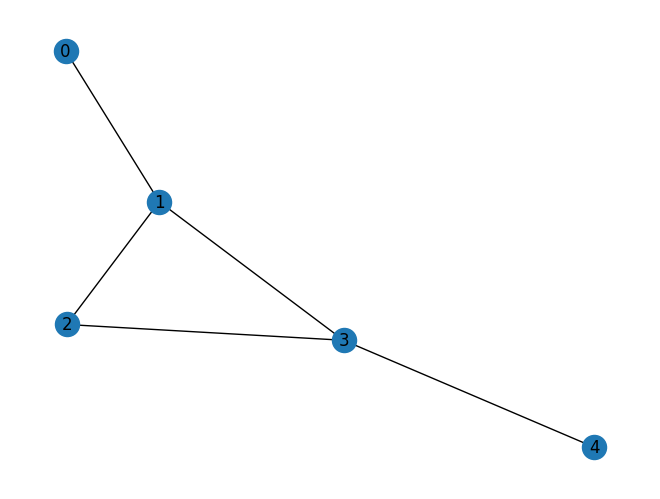

In [2]:
G = nx.path_graph(5)
G.add_edge(1,3)
b = 1


nx.draw(G, with_labels=True)

In [3]:
m, critical_nodes = solve_modified_1hop_DCND(G, b)

Solving updated DCNDP ...
Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-01
Set parameter Threads to value 16
-=======
All constraints added
Start optimizing...
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 16 threads

         Reduce the value of the Threads parameter to improve performance


Optimize a model with 36 rows, 20 columns and 90 nonzeros
Model fingerprint: 0xdec5f4ca
Variable types: 10 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-03, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 5.0000000
Presolve removed 36 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 12 availa

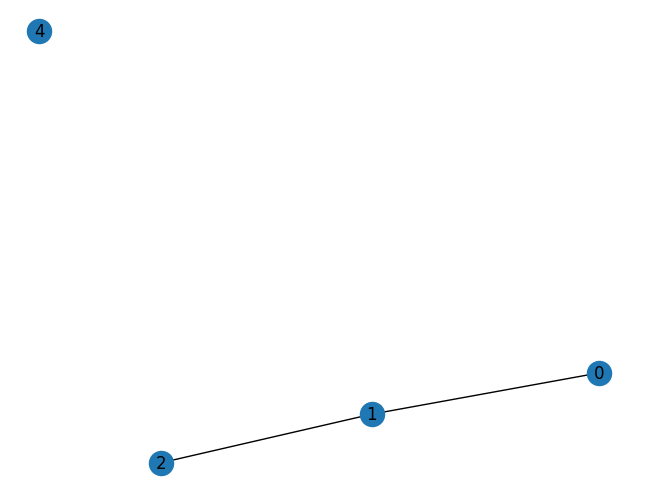

In [4]:
G.remove_nodes_from(critical_nodes)

nx.draw(G, with_labels=True)

## Modified 2hop

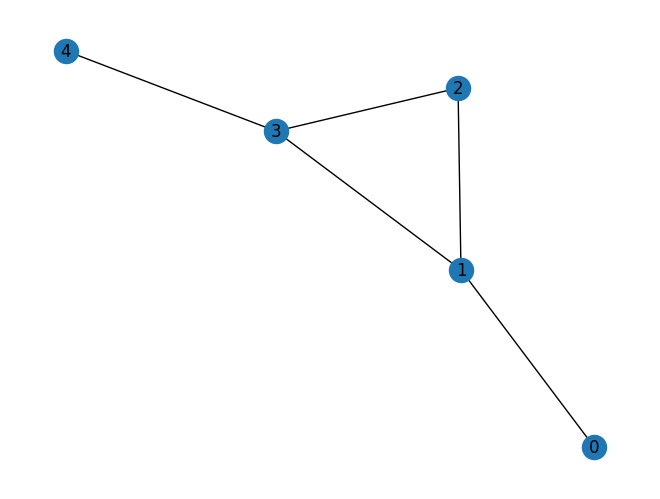

In [5]:
G = nx.path_graph(5)
G.add_edge(1,3)
b = 1


nx.draw(G, with_labels=True)

In [6]:
m, critical_nodes, _, _ = solve_modified_2hop_DCND(G, b)

Solving 2hop DCND ...
Set parameter Threads to value 10
Set parameter Method to value 3
All constraints added
Start optimizing...
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 10 threads

Optimize a model with 68 rows, 32 columns and 178 nonzeros
Model fingerprint: 0x225f05f1
Variable types: 27 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e-06, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 68 rows and 32 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 3.1575 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.157500000000e+00, best bound 3.157500000000e+00, gap 0.0000%
# of critical nodes:  1
# of 

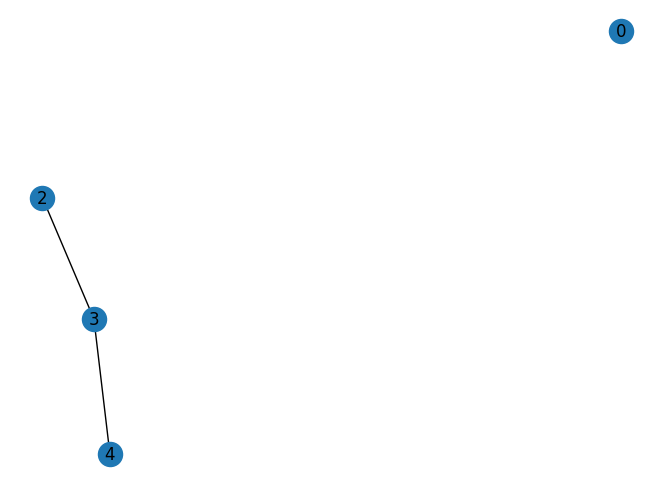

In [8]:
G.remove_nodes_from(critical_nodes)

nx.draw(G, with_labels=True)